#### <code>Statistics</code>



# Random Number and PDF Sampling Method

---


<small>Ridlo W. Wibowo | Last update: 2023-03-28</small>

## Random Number vs Pseudo-Random Number

+ **true random number**s generator (TRNG), e.g. https://www.random.org/

+ computer $\rightarrow$ pseudo-random number generator (PRNG)

How computer generate (pseudo)-random number?

We need random number to do **Monte Carlo** simulation, 

+ Monte Carlo method/experiment/simulation is a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. 

+ The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. 

+ Monte Carlo methods are mainly used in three problem classes: *optimization*, *numerical integration*, and *generating draws from a probability distribution*.

+ In the next class we will learn some real examples

### Pseudo-Random Number Generator

#### Linear Congruential Generator

Linear Congruential Generator merupakan generator bilangan random paling sederhana. Perumusan yang digunakan adalah:

$$r_{n+1} = (a \times r_{n} + c) \mod m$$

dengan

$r_{0} = \text{ seed}$

$r_{1}, r_{2}, r_{3}, ... = \text{ random numbers}$

$a$, $c$, $m$ adalah konstanta (multiplier, increment, dan modulo)

+ Jika kita dapat memilih konstanta $a$, $c$, dan $m$ dengan teliti, maka kita akan mendapatkan generator bilangan random uniform antara $0$ hingga $m-1$.

+ Kekurangan dari LCG adalah $r_{n}$ dan $r_{n+1}$ tidak bebas sebagai bilangan random. Kita dapat memprediksi $r_{n+1}$ apabila $r_{n}$ diketahui, hal ini menyebabkan LCG tidak aman secara *cryptography*. Namun LCG cukup bagus untuk pekerjaan selain berhubungan dengan keamanan, misalnya integrasi monte carlo, selain itu algoritmanya sangat mudah diterapkan dalam bahasa pemrograman.

+ Pemilihan konstanta untuk [LCG](https://en.wikipedia.org/wiki/Linear_congruential_generator) dapat kita tentukan sendiri secara hati-hati.

Misal *Pseudo Random Number Generator* (PRNG) yang digunakan Microsoft (old):

$$\text{state}_{n+1} = 214013 \times \text{state}_{n} + 2531011 (\mod 2^{31})$$

$$\text{rand}_{n} = \text{state}_{n} \div 2^{16} $$

$\text{rand}_{n}$ berada pada rentang 0 - 32767 (resolusi) dan memiliki periode $2^{31} - 1$

In [1]:
## Contoh
num = 15
seed = 2
result = []
for i in range(num):
    seed = (15*seed + 25 ) % 7
    result.append(seed)

print(result)

[6, 3, 0, 4, 1, 5, 2, 6, 3, 0, 4, 1, 5, 2, 6]


####  Mersenne Twister

+ by far the most widely used general-purpose PRNG; default PRNG in current computing env/programming language
+ its name derives from the fact that its period length is chosen to be a *Mersenne prime*. 
+ developed in 1997 by Makoto Matsumoto and Takuji Nishimura
+ The most commonly used version of the Mersenne Twister algorithm is based on the Mersenne prime $2^{19937} - 1$  
+ it is similar to LCG but with a twist ... ;)

In [2]:
import numpy as np

np.random.seed(seed=42) # None

np.random.random(10) # generate random number from 0 to 1

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258])

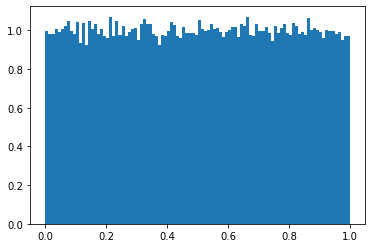

In [3]:
import matplotlib.pyplot as plt

plt.hist(np.random.random(100000), bins=100, density=True);

**Bagaimana untuk diluar rentang 0-1?**

In [4]:
# in python (numpy)
np.random.uniform(5, 10, 30)

array([5.0532815 , 9.3513907 , 6.22697913, 7.20545747, 5.76275223,
       8.39054286, 7.72648828, 6.82394878, 7.67596822, 5.84368294,
       8.87819216, 6.32979574, 8.07512285, 9.49700019, 5.19292804,
       6.93766971, 5.6745888 , 9.54328855, 6.80038722, 6.06670463,
       8.38238288, 7.71596394, 9.08468341, 8.76534079, 9.87334926,
       5.45266154, 5.40136384, 9.53680349, 9.77866112, 7.03317173])

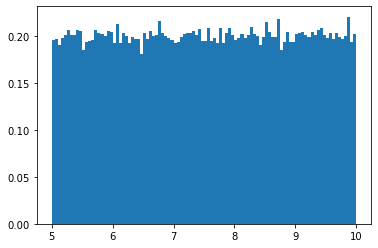

In [5]:
plt.hist(np.random.uniform(5, 10, 100000), bins=100, density=True);

**Bagaimana untuk bentuk distribusi selain Uniform?**

In [6]:
# in python (numpy)
np.random.normal(5, 2, 30)

array([2.34398256, 8.08699972, 6.77397922, 6.42720286, 4.99905059,
       7.12181625, 6.99745884, 3.14692108, 5.41343642, 5.83217632,
       4.38953008, 7.48719706, 8.91457404, 7.41679949, 3.15358537,
       5.08592359, 3.94903954, 4.21856471, 4.14210864, 7.20919969,
       3.11082422, 3.57804285, 5.37489091, 8.77716676, 7.93399743,
       6.05380431, 3.28473732, 5.85442407, 7.06358334, 7.68189069])

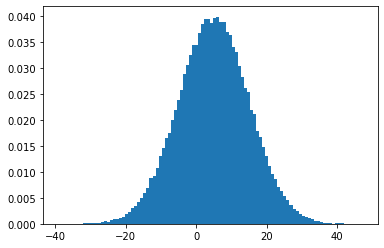

In [7]:
plt.hist(np.random.normal(5, 10, 100000), bins=100, density=True);

## PDF Sampling
---

How can we generate a set of random `numbers` that follow certain `distribution function`? What about multiple random variables (2D, 3D, 4D, ...)?

+ **Generating function**, for special cases
    + Example:
        + Uniform distribution: LCG, Mersenne Twister
        + Gaussian distribution: Box-Muller transform, Marsaglia 
        
        
+ **Inverse Transform**, using the inverse-CDF 
    + from uniform to other distribution
    + we need to have the inverse-CDF of the target distribution
    

+ **Acceptance-Rejection** method / Rejection sampling
    + This method relates to the general field of "Monte Carlo techniques"

    
+ **Markov Chain Monte Carlo (MCMC)** method, similar to Acceptance-Rejection method
    + Metropolis-Hastings sampling
    + Gibbs sampling
    + etc

### Gaussian Random Generator
---

**Box-Muller Transform**

A method to generate Gaussian random number from uniform random number

$u_1, u_2 =$ uniform random number [0, 1]

We can generate gaussian random number ($z_1$ or $z_2$) with $\mu = 0$ and $\sigma = 1$

$z_1 = \sqrt{-2 \ln{u_1}} \cdot \cos{2 \pi u_2}$

$z_2 = \sqrt{-2 \ln{u_1}} \cdot \sin{2 \pi u_2}$

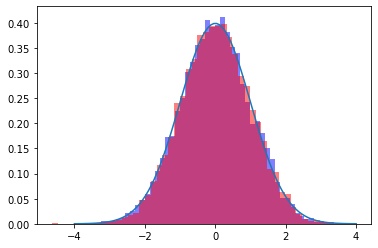

In [8]:
import numpy as np
from scipy.stats import norm

npoints = 10000
u1 = np.random.random(npoints)
u2 = np.random.random(npoints)

z1 = np.sqrt(-2.0*np.log(u1)) * np.cos(2*np.pi*u2) # we can generate 2 gaussian random number
z2 = np.sqrt(-2.0*np.log(u1)) * np.sin(2*np.pi*u2)

plt.hist(z1, bins=50, density=1, alpha=0.5, linewidth=0, color='blue') # normalize to 1
plt.hist(z2, bins=50, density=1, alpha=0.5, linewidth=0, color='red')

xp = np.linspace(-4,4,100)
plt.plot(xp, norm.pdf(xp)) # of course normalize (pdf)

**Marsaglia polar method**

+ The polar form of the Box-Muller transformation. 
+ It is both faster and more robust numerically. 
+ It is faster because it does the equivalent of the sine and cosine geometrically without a call to the trigonometric function library.

with

$0 < s = u_1^2 + u_2^2 < 1$

$u_1, u_2 = $ uniform random number [-1, 1]

we can change the transformation,

$z_1 = u_1 \sqrt{\frac{-2 \ln{s}}{s}}$

$z_2 = u_2 \sqrt{\frac{-2 \ln{s}}{s}}$

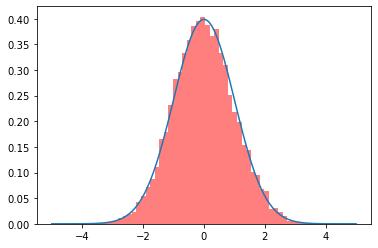

In [9]:
import numpy as np
from scipy.stats import norm

def random_normal():
    s = 1.0
    while ( s >= 1.0 ):
        u1 = 2.0 * np.random.random() - 1.0;
        u2 = 2.0 * np.random.random() - 1.0;
        s = u1*u1 + u2*u2

    w = np.sqrt(-2.0 * np.log(s)  / s)
    z1 = u1 * w
    # z2 = u2 * w
    return z1


N = 10000
z = [random_normal() for i in range(N)]

plt.hist(z, bins=50, density=1, alpha=0.5, linewidth=0, color='red');

xp = np.linspace(-5,5,100)
plt.plot(xp, norm.pdf(xp));

### Inverse Transform Sampling
---

- In many cases, we want to sample a probability density function. However,  only a few well define PDF like Gaussian has a 'generator function'. 

- We can sample a PDF by inversing it, **if** we can (easily) inverse the CDF (cumulative density function). 

- Steps: 
    + Calculate CDF $F(x) = \int_{-\infty}^{x} f(x) dx$
    + Calculate inverse-CDF $F^{-1}(p), p \in (0, 1)$
        + Generate uniform random variable $u \in [0, 1]$
        + Calculate $x = F^{-1}(u)$
        
        
<img src="https://raw.githubusercontent.com/ridlo/statistics/main/img/Inverse_transformation.jpg" width=400 />

**Uniform to other Uniform**

---

How can we transfrom uniform distribution in a range of [0, 1) to [low, high)?

PDF of uniform distribution from $a$ to $b$:

$$f(x) = \frac{1}{b - a}$$

we can prove that $\int_{a}^{b} f(x) dx = \int_{a}^{b} \frac{1}{b - a} dx = 1$

the CDF of uniform distribution:

$$F(x=x') = \int_{a}^{x'} \frac{1}{b - a} dx = \left[ \frac{x}{b - a} \right]_{a}^{x'}$$

$$F(x=x') = \left[ \frac{x'}{b - a} \right] - \left[ \frac{a}{b - a} \right]$$

$$F(x=x') = \frac{x' - a}{b - a} $$

or 
$$F(x) = \frac{x - a}{b - a}$$

the inverse-CDF (PPF) of uniform distribution

$$p = \frac{x - a}{b -a} $$

$$x = a + p(b - a)$$

therefore

$$F^{-1}(p) = a + p(b - a) \quad \text{where} \quad p \in (0, 1) $$


Hence, if we want to get a random distribution in the range from $\text{low}$ to $\text{high}$ from a uniform distribution $u [0, 1)$ we can use formula:

$$\text{low} + u \cdot (\text{high} - \text{low})$$

In [10]:
low = 5
high = 7.5

low + (high-low)*np.random.random(10)

array([6.60613972, 6.84791976, 6.82936919, 6.15639195, 6.30270169,
       6.50680569, 5.29163372, 6.94141041, 7.47915562, 6.85800349])

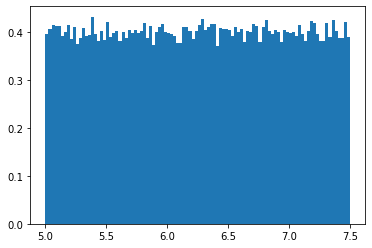

In [11]:
plt.hist(low + (high-low)*np.random.random(100000), bins=100, density=True);

In [12]:
# numpy built-in function to get the same result
# uniform distribution in range [a, b)
# numpy.random.uniform(low=0.0, high=1.0, size=None)

np.random.uniform(10, 15 , 5)

array([12.86768314, 14.24204108, 14.91172327, 13.24382444, 13.0711458 ])

**Example**

We want to generate direction in 2D (angle) as a random variable with uniform distribution, how can we do that?

**Uniform in 2D and 3D**

---

+ let $u$, $v$, and $w$ as a uniform random sample from 0 to 1
+ we want to generate uniform random dist in 2D and 3D using uniform random dist ($u$, $v$, and/or $w$)


**Rectangle**

---
in Cartesian coordinate

$x = x_\text{low} + (x_\text{high} - x_\text{low})u$

$y = y_\text{low} + (y_\text{high} - y_\text{low})v$

for 3D (box):

$z = z_\text{low} + (z_\text{high} - z_\text{low})w$

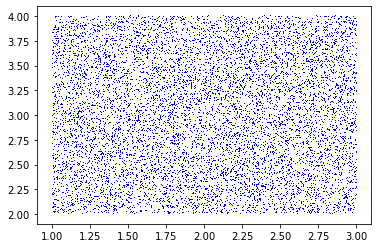

In [13]:
Nsamp = 10000
x = np.random.uniform(1, 3, Nsamp)
y = np.random.uniform(2, 4, Nsamp)

plt.plot(x, y, 'b,')

**Disk**

---

we can generate 2D uniform random distribution a the form of disk/circle

using inverse-transform method for a uniform-disc-shape distribution, we can use Polar coordinate to get

$\theta = 2 \pi u$

$r = \sqrt{R^2 v} = R \sqrt{v}$

**Exercise: Prove it!**

after that we can transform it to Cartesian coordinate:

$x = r \cos{\theta}$

$y = r \sin{\theta}$

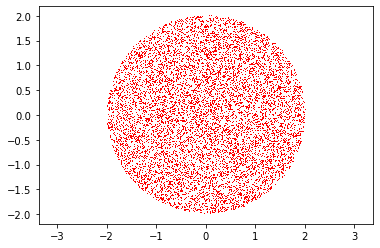

In [14]:
## disk 
R = 2.0
Nsamp = 10000

theta = 2 * np.pi * np.random.random(Nsamp)
r = np.sqrt(R*R * np.random.random(Nsamp))

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x, y, 'r,')
plt.axis('equal');

**Annulus**

---

likewise, for annulus shape, in Polar coordinate:

$\theta = 2 \pi u$

$r = \sqrt{(R_\text{end}^{2} - R_\text{start}^{2}) v + R_\text{start}^{2}}$

transform to Cartesian coordinate:

$x = r \cos \theta$

$y = r \sin \theta$

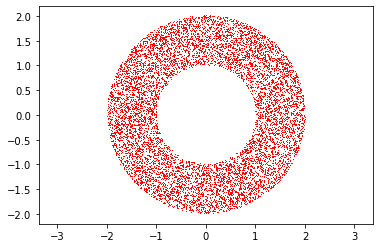

In [15]:
Rstart = 1.0
Rend = 2.0
Nsamp = 10000

DeltaRsq = Rend**2 - Rstart**2
Rstart2 = Rstart*Rstart

theta = 2 * np.pi * np.random.random(Nsamp)
r = np.sqrt(DeltaRsq * np.random.random(Nsamp) + Rstart2)

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.plot(x, y, 'r,')
plt.axis('equal');

**Spherical surface / 3D direction**

---

in Spherical coordinate:

$\phi = 2 \pi u$

$\theta = \arccos(2 v - 1)$

with a contant $r$

$x = r \sin \theta \cos \phi$

$y = r \sin \theta \sin \phi$

$z = r \cos \theta$

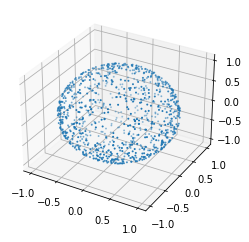

In [16]:
r = 1
Nsamp = 1000

phi = 2 * np.pi * np.random.random(Nsamp)
theta = np.arccos(1 - 2*np.random.random(Nsamp))

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

fig = plt.figure()
ax = fig.gca(projection='3d')

scat = ax.scatter(x, y, z, s=1)

**Sphere**

---

in Spherical coordinate:

$\phi = 2 \pi u$

$\theta = \arccos(2 v - 1)$

$r = \sqrt[3]{R^{3} w} = R \sqrt[3]{w}$

transform to Cartesian coordinate:

$x = r \sin \theta \cos \phi$

$y = r \sin \theta \sin \phi$

$z = r \cos \theta$



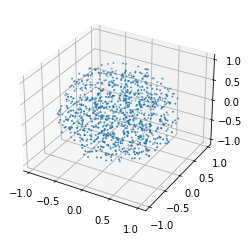

In [17]:
Nsamp = 1000

phi = 2 * np.pi * np.random.random(Nsamp)
theta = np.arccos(1 - 2*np.random.random(Nsamp))
r = 1 * np.random.random(Nsamp)**(0.333333)

x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

fig = plt.figure()
ax = fig.gca(projection='3d')

scat = ax.scatter(x, y, z, s=1)

### Acceptance-Rejection Sampling (Rejection sampling)
---

Acceptance-rejection method assume we have a simpler p.d.f. $q^*(x)$ which we can easily draw samples. Our proposal distribution $q^*(x)$ must cover targeted p.d.f $p^*(x)$ in our interested region.

$$q^*(x) > p^*(x), \quad \text{for all } x \quad (\text{or interested region } x)$$

*Steps*:
- generate random variable $x$ in our interested region $[x_{min}, x_{max}]$
- evaluate $p^*(x)$ 
- generate random variable $y$ in the range $[0, q^*(x)]$
- if $y < p^*(x)$, then accept $x$, otherwise reject $x$.

Note: $p^*(x)$ and $q^*(x)$ is not-normalized distribution function

**Example**

Lets try some proposal distribution to generate p.d.f $p^*(x)$

$$p^*(x) = \exp[0.4(x-0.4)^2 - 0.08x^4]$$

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [19]:
def pdftarget(x, norm=1):
    return np.exp(0.4*(x - 0.4)*(x - 0.4) - 0.08*x*x*x*x)/norm

In [20]:
# integrate, for normalization
I = quad(pdftarget, -100, 100)
print(I)

(7.8521781788662155, 1.4333245838148234e-08)


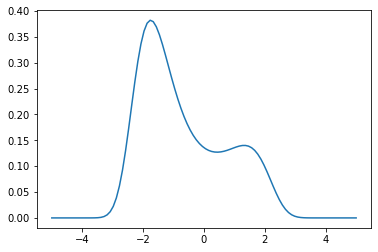

In [21]:
xmin, xmax = -5, 5
N = 100
x = np.linspace(xmin, xmax, N)
y = pdftarget(x, norm=I[0])

plt.plot(x, y)

**Uniform proposal distribution**

In [22]:
def sampling(nsamples=1000, xmin=-5, xmax=5):
    I = quad(pdftarget, -100, 100) # integrate
    normalize = I[0]
    
    x = np.linspace(xmin, xmax, 1000)
    p = pdftarget(x, norm=normalize)
    yhighest = np.amax(p)
    c = 1.01*yhighest
    
    # start
    xsample = xmin + (xmax - xmin)*np.random.random(nsamples) # uniform proposal distribution
    p = pdftarget(xsample, norm=normalize)
    ysample = c*np.random.random(nsamples)
    
    accept = ysample <= p
    
    return xsample, ysample, accept, c, normalize

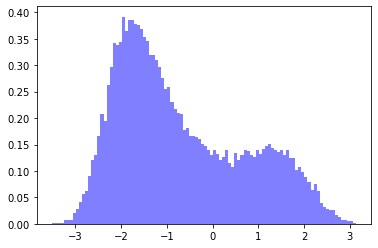

In [23]:
xsample, ysample, accept, c, normalize = sampling(nsamples=100000)

xaccept = xsample[accept]

plt.hist(xaccept, bins=100, density=True, histtype='stepfilled', color='blue', alpha=0.5);

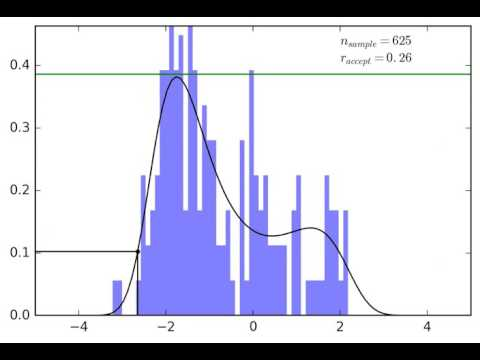

In [24]:
from IPython.display import YouTubeVideo

YouTubeVideo("hObkFth7kMs")

**Gaussian proposal distribution**

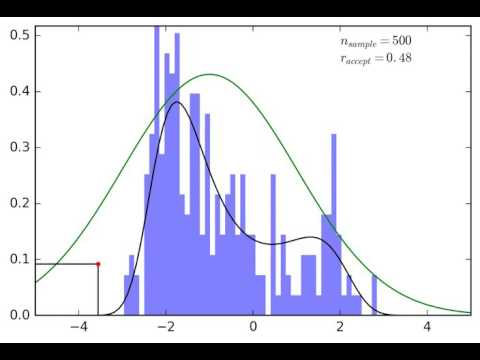

In [25]:
YouTubeVideo("M_kyGLaqqgQ")

**Triangle proposal distribution**

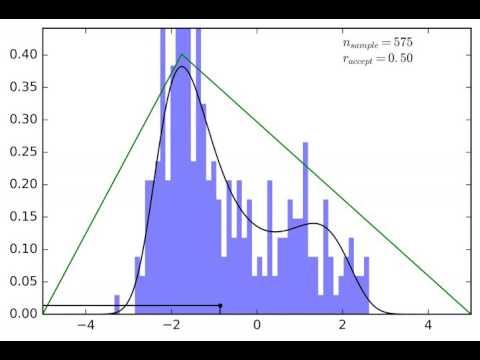

In [26]:
YouTubeVideo("Pk2pSMDIXww")

**Example**

Find $\pi$ using Monte Carlo Method, i.e. Acceptance-Rejection Sampling

by counting the number of point inside a quarter of circle, we can approximate the area of it (*acceptance-rejection sampling*)

$\frac{\text{Area}_\text{quarter circle}}{\text{Area}_\text{square}} = \frac{N_\text{inside}}{N}$

the area of a quarter of circle:

$\text{Area}_\text{quarter circle} = \frac{1}{4} \pi r^2 = \frac{\pi}{4}$

hence

$\frac{\pi / 4}{1} = \frac{N_\text{inside}}{N_\text{total}}$

$\pi = 4 \cdot \frac{N_\text{inside}}{N_\text{total}}$



<img src="https://raw.githubusercontent.com/ridlo/statistics/main/img/Pi.gif" width=400>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

Nsamp = 10000
x = np.random.random(Nsamp)
y = np.random.random(Nsamp)

accept = x**2 + y**2 < 1

print("Total number of point: ", Nsamp)
print("Number of point inside a quarter of circle: ", np.count_nonzero(accept))
print("Value of pi: ", 4 * np.count_nonzero(accept) / Nsamp)

Total number of point:  10000
Number of point inside a quarter of circle:  7905
Value of pi:  3.162


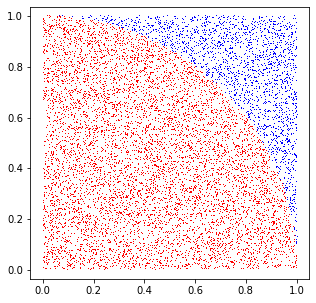

In [28]:
plt.figure(figsize=(5,5))
plt.plot(x, y, 'b,')
plt.plot(x[accept], y[accept], 'r,')
plt.axis('equal');

**Exercise**:

1. Andaikan kita akan melakukan simulasi $N$-body terkait pembentukan Tata Surya. Untuk itu kita butuh membuat asteroid *dummy* pada rentang jarak 2 hingga 4 sa dari Matahari; terdistribusi dalam bentuk cincin 2 dimensi. Kita ingin asteroid *dummy* juga tersebar secara homogen atau uniform. 
    + buatlah data posisi ($x$ dan $y$) secara random untuk 10000 asteroid *dummy*  dengan menggunakan *inverse-transform sampling*.
    + buatlah data posisi ($x$ dan $y$) secara random untuk 5000 asteroid *dummy* dengan menggunakan *acceptance-rejection sampling*.
    

### MCMC: Metropolis-Hastings Algorithm
---

We use a proposal distribution $Q(x' | x^{(t)})$ to generate a proposed next state $x'$ based on current state $x^{(t)}$.

**Metropolis-Hastings Algorithm:**
0. Initiate state $x^{(t=0)}$
1. Generate a proposed state from $Q(x' | x^{(t)})$
2. Compute $a = \frac{f^{*}(x')}{f^{*}(x^{(t)})} \frac{Q(x^{(t)} | x')}{Q(x' | x^{(t)})}$
3. If $a \ge 1$ accept proposed state $x'$
4. Otherwise, generate $u$ from a uniform distribution in interval $[0, 1]$ and accept the proposed state if $a \ge u$.
5. If the state is accepted, we set $x^{(t+1)} = x'$
6. If the state is rejected, stick to the previous state and set $x^{(t+1)} = x^{(t)}$

Note that if $Q(x' | x^{(t)})$ is symmetric, the ratio of $\frac{Q(x^{(t)} | x')}{Q(x' | x^{(t)})}$ is always 1.

In [29]:
def sampling_mcmc_mh(xt, stepsize, nsamp):
    samples = np.empty(nsamp)
    accept = np.empty(nsamp)
    for i in range(nsamp):
        xprime = xt + stepsize*np.random.normal() # gaussian proposal distribution
        a = pdftarget(xprime)/pdftarget(xt) # symmetric -> gaussian
        if a >= 1.0:
            xt = xprime
            accept[i] = 1
        else:
            u = np.random.random()
            if a >= u:
                xt = xprime
                accept[i] = 1
            else:
                accept[i] = 0 # reject xprime, xt = xt
        
        samples[i] = xt
        
    return samples, accept

In [30]:
mu = 0
sigma = 2
nsamp = 10000

samples, accept = sampling_mcmc_mh(mu, sigma, nsamp)

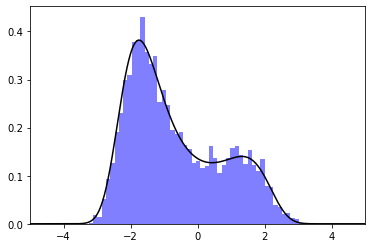

In [31]:
nbins = 50
xmin, xmax = -5, 5

I = quad(pdftarget, -5, +5)
x = np.linspace(xmin, xmax, 1000)
y = pdftarget(x, I[0])

plt.hist(samples, bins=nbins, density=True, histtype="stepfilled", color="blue", alpha=0.5, linewidth=0)
plt.plot(x, y, 'k')
plt.xlim([xmin, xmax])
plt.show()

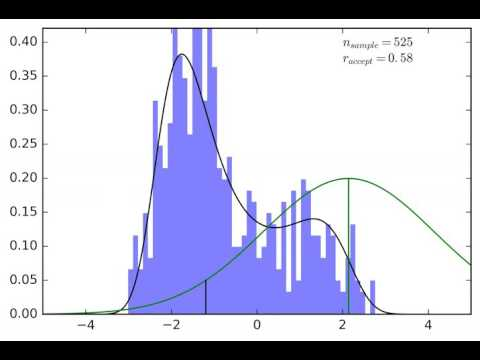

In [32]:
YouTubeVideo("zL2lg_Nfi80")